# Autour du Paradoxe de Simpson

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

## Obtention et pré-traitement des données

Les données sont présentes sur le Gitlab du MOOC. Par sécurité elles sont téléchargées localement. Il n'est néanmoins pas nécessaire (et contre-productif) de re-télécharger le fichier à chaque exécution, le téléchargement n'a lieux que si le fichier de données n'est pas présent sur la machine.



In [2]:
data_url="https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"
data_file="Subject6_smoking.csv.csv"
import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

On affiche un aperçu des données :

In [3]:
raw_data = pd.read_csv(data_file)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

On vérifie qu'aucune ligne ne soit vide de valeur.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]


Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Aucun soucis n'a été repéré sur les données, elles semblent être exploitables en l'état.

In [5]:
data=raw_data #we rename for coherence

## Première exploitation des données

On effectue une analyse simple (simpliste?) sur les données. On commence par compter le nombre de fumeurs et non-fumeur

In [6]:
smokers=pd.DataFrame.sum(data['Smoker']=='Yes')
print('Nombre de fumeurs =',smokers)
non_smokers=pd.DataFrame.sum(data['Smoker']=='No')
print('Nombre de non fumeurs =',non_smokers)
total=smokers+non_smokers
print('Taille de l\'échantillon =',total)


Nombre de fumeurs = 582
Nombre de non fumeurs = 732
Taille de l'échantillon = 1314


On calcule maintenant le taux de mortalité pour ces deux groupes :

In [7]:
deaths_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')&(data['Status']=='Dead'))
death_rate_smokers=deaths_smokers/smokers
deaths_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')&(data['Status']=='Dead'))
death_rate_non_smokers=deaths_non_smokers/non_smokers
death_rate_total=(deaths_smokers+deaths_non_smokers)/total
print('Mortalité fumeur =',round(death_rate_smokers,3))
print('Mortalité non fumeur =', round(death_rate_non_smokers,3))
print('Mortalité de l\'échantillon =',round(death_rate_total,3))

Mortalité fumeur = 0.239
Mortalité non fumeur = 0.314
Mortalité de l'échantillon = 0.281


On arrange ces informations sous forme d'un tableau

In [8]:
print('                  Fumeurs     Non-fumeurs     Total')
print('                  ------------------------------------')
print('Taille du groupe  ',smokers,'       ',non_smokers,'         ',total)
print('Vivant            ',smokers-deaths_smokers,'       ',non_smokers-deaths_non_smokers,'         ',total-deaths_smokers-deaths_non_smokers)
print('Mort              ',deaths_smokers,'       ',deaths_non_smokers,'         ',deaths_smokers+deaths_non_smokers)
print('Mortalité         ',round(death_rate_smokers,3),'    ',round(death_rate_non_smokers,3),'        ',round(death_rate_total,3))

                  Fumeurs     Non-fumeurs     Total
                  ------------------------------------
Taille du groupe   582         732           1314
Vivant             443         502           945
Mort               139         230           369
Mortalité          0.239      0.314          0.281


On peut également les représenter sous forme de graphique circulaire

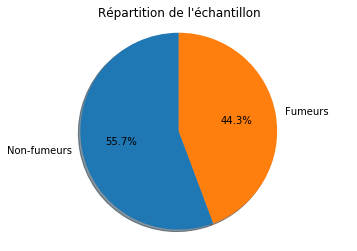

In [9]:
labels = 'Non-fumeurs', 'Fumeurs'
sizes = [non_smokers/total,(smokers/total)]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal') 
plt.title('Répartition de l\'échantillon')
plt.show()


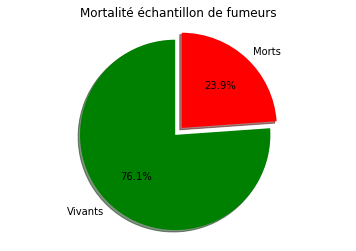

In [10]:
labels = 'Vivants', 'Morts'
sizes = [1-death_rate_smokers,death_rate_smokers]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode,startangle=90,shadow=True,autopct='%1.1f%%',colors=('green','red'))
ax1.axis('equal')  
plt.title('Mortalité échantillon de fumeurs')
plt.show()

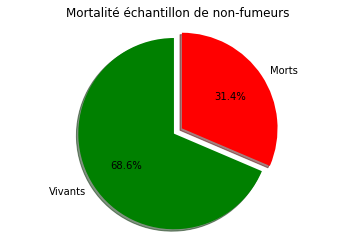

In [11]:
labels = 'Vivants', 'Morts'
sizes = [1-death_rate_non_smokers,death_rate_non_smokers]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode,startangle=90,shadow=True,autopct='%1.1f%%',colors=('green','red'))
ax1.axis('equal')  
plt.title('Mortalité échantillon de non-fumeurs')
plt.show()

Intervalle de confiance ?

Il apparait alors que la mortalité est plus importante au sein de l'échantillon 'non-fumeur', une conclusion hâtive peut donc nous amener à mettre en doute la plus connues des inscription figurant sur les paquets de cigarettes actuels.

## Prise en compte de l'âge

Notre analyse précédante nous mêne à une contradiction avec le célèbre _Fumer Tue_. On se penche donc sur la répartition d'âge au sein des groupes afin de voir si cela peut mener à une explication.
On commence par regrouper par tranche d'âge (18-34,34-54,55-64,65+)

In [12]:
data.loc[data['Age']<35,'Categorie d\'age'] = 'A'
data.loc[(data['Age']<55) & (data['Age']>=35),'Categorie d\'age'] = 'B'
data.loc[(data['Age']<65) & (data['Age']>=55),'Categorie d\'age'] = 'C'
data.loc[data['Age']>=65,'Categorie d\'age'] = 'D'

On vérifie que la somme des sous-groupe soit bien égale au nombre total des donnés. 

In [13]:
A_total=pd.DataFrame.sum((data['Categorie d\'age']=='A'))
B_total=pd.DataFrame.sum((data['Categorie d\'age']=='B'))
C_total=pd.DataFrame.sum((data['Categorie d\'age']=='C'))
D_total=pd.DataFrame.sum((data['Categorie d\'age']=='D'))
print('Categorie d\'âge           18-34            35-54            55-64           65+      total')
print('-------------------------------------------------------------------------------------------')
print('Taille de l\'échantillon    ',A_total,'            ',B_total,'            ',C_total,'         ',D_total,'      ',A_total+B_total+C_total+D_total)


Categorie d'âge           18-34            35-54            55-64           65+      total
-------------------------------------------------------------------------------------------
Taille de l'échantillon     416              420              236           242        1314


Il ne semble pas y avoir d'erreur sur le découapage en sous-échantillons, on procède donc aux même analyses que précédement appliquées cette fois-ci par tranches d'âges.

### Catégorie d'âge 18-34

In [14]:
A_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')& (data['Categorie d\'age']=='A'))
A_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')& (data['Categorie d\'age']=='A'))
A_total=A_smokers+A_non_smokers

A_deaths_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')&(data['Status']=='Dead')&(data['Categorie d\'age']=='A'))
A_death_rate_smokers=A_deaths_smokers/A_smokers
A_deaths_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')&(data['Status']=='Dead')&(data['Categorie d\'age']=='A'))
A_death_rate_non_smokers=A_deaths_non_smokers/A_non_smokers
A_death_rate_total=(A_deaths_smokers+A_deaths_non_smokers)/A_total


print('                  Fumeurs     Non-fumeurs     Total')
print('                  ------------------------------------')
print('Taille du groupe  ',A_smokers,'       ',A_non_smokers,'         ',A_total)
print('Vivant            ',A_smokers-A_deaths_smokers,'       ',A_non_smokers-A_deaths_non_smokers,'         ',A_total-A_deaths_smokers-A_deaths_non_smokers)
print('Mort              ',A_deaths_smokers,'         ',A_deaths_non_smokers,'           ',A_deaths_smokers+A_deaths_non_smokers)
print('Mortalité         ',round(A_death_rate_smokers,3),'     ',round(A_death_rate_non_smokers,3),'       ',round(A_death_rate_total,3))

                  Fumeurs     Non-fumeurs     Total
                  ------------------------------------
Taille du groupe   189         227           416
Vivant             182         221           403
Mort               7           6             13
Mortalité          0.037       0.026         0.031


### Catégorie d'age 35-54

In [15]:
B_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')& (data['Categorie d\'age']=='B'))
B_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')& (data['Categorie d\'age']=='B'))
B_total=B_smokers+B_non_smokers

B_deaths_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')&(data['Status']=='Dead')&(data['Categorie d\'age']=='B'))
B_death_rate_smokers=B_deaths_smokers/B_smokers
B_deaths_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')&(data['Status']=='Dead')&(data['Categorie d\'age']=='B'))
B_death_rate_non_smokers=B_deaths_non_smokers/B_non_smokers
B_death_rate_total=(B_deaths_smokers+B_deaths_non_smokers)/B_total


print('                  Fumeurs     Non-fumeurs     Total')
print('                  ------------------------------------')
print('Taille du groupe  ',B_smokers,'       ',B_non_smokers,'          ',B_total)
print('Vivant            ',B_smokers-B_deaths_smokers,'       ',B_non_smokers-B_deaths_non_smokers,'          ',B_total-B_deaths_smokers-B_deaths_non_smokers)
print('Mort              ',B_deaths_smokers,'        ',B_deaths_non_smokers,'           ',B_deaths_smokers+B_deaths_non_smokers)
print('Mortalité         ',round(B_death_rate_smokers,3),'      ',round(B_death_rate_non_smokers,3),'        ',round(B_death_rate_total,3))

                  Fumeurs     Non-fumeurs     Total
                  ------------------------------------
Taille du groupe   229         191            420
Vivant             190         172            362
Mort               39          19             58
Mortalité          0.17        0.099          0.138


### Catégorie d'age 55-64

In [16]:
C_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')& (data['Categorie d\'age']=='C'))
C_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')& (data['Categorie d\'age']=='C'))
C_total=C_smokers+C_non_smokers

C_deaths_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')&(data['Status']=='Dead')&(data['Categorie d\'age']=='C'))
C_death_rate_smokers=C_deaths_smokers/C_smokers
C_deaths_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')&(data['Status']=='Dead')&(data['Categorie d\'age']=='C'))
C_death_rate_non_smokers=C_deaths_non_smokers/C_non_smokers
C_death_rate_total=(C_deaths_smokers+C_deaths_non_smokers)/C_total


print('                  Fumeurs     Non-fumeurs     Total')
print('                  ------------------------------------')
print('Taille du groupe  ',C_smokers,'       ',C_non_smokers,'           ',C_total)
print('Vivant            ',C_smokers-C_deaths_smokers,'        ',C_non_smokers-C_deaths_non_smokers,'            ',C_total-C_deaths_smokers-C_deaths_non_smokers)
print('Mort              ',C_deaths_smokers,'        ',C_deaths_non_smokers,'            ',C_deaths_smokers+C_deaths_non_smokers)
print('Mortalité         ',round(C_death_rate_smokers,3),'     ',round(C_death_rate_non_smokers,3),'         ',round(C_death_rate_total,3))

                  Fumeurs     Non-fumeurs     Total
                  ------------------------------------
Taille du groupe   115         121             236
Vivant             64          81              145
Mort               51          40              91
Mortalité          0.443       0.331           0.386


### Catégorie d'âge 65+

In [17]:
D_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')& (data['Categorie d\'age']=='D'))
D_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')& (data['Categorie d\'age']=='D'))
D_total=D_smokers+D_non_smokers

D_deaths_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')&(data['Status']=='Dead')&(data['Categorie d\'age']=='D'))
D_death_rate_smokers=D_deaths_smokers/D_smokers
D_deaths_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')&(data['Status']=='Dead')&(data['Categorie d\'age']=='D'))
D_death_rate_non_smokers=D_deaths_non_smokers/D_non_smokers
D_death_rate_total=(D_deaths_smokers+D_deaths_non_smokers)/D_total


print('                  Fumeurs     Non-fumeurs     Total')
print('                  ------------------------------------')
print('Taille du groupe  ',D_smokers,'        ',D_non_smokers,'          ',D_total)
print('Vivant            ',D_smokers-D_deaths_smokers,'         ',D_non_smokers-D_deaths_non_smokers,'           ',D_total-D_deaths_smokers-D_deaths_non_smokers)
print('Mort              ',D_deaths_smokers,'        ',D_deaths_non_smokers,'          ',D_deaths_smokers+D_deaths_non_smokers)
print('Mortalité         ',round(D_death_rate_smokers,3),'     ',round(D_death_rate_non_smokers,3),'        ',round(D_death_rate_total,3))

                  Fumeurs     Non-fumeurs     Total
                  ------------------------------------
Taille du groupe   49          193            242
Vivant             7           28             35
Mort               42          165            207
Mortalité          0.857       0.855          0.855


### Analyse

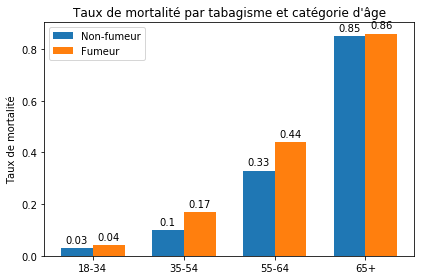

In [18]:
labels = ['18-34', '35-54', '55-64', '65+']
nn_smkers_dth_rt = [A_death_rate_non_smokers,B_death_rate_non_smokers,C_death_rate_non_smokers,D_death_rate_non_smokers]
nn_smkers_dth_rt = [round(num, 2) for num in nn_smkers_dth_rt]
smkers_dth_rt = [A_death_rate_smokers,B_death_rate_smokers,C_death_rate_smokers,D_death_rate_smokers]
smkers_dth_rt = [round(num, 2) for num in smkers_dth_rt]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nn_smkers_dth_rt, width, label='Non-fumeur')
rects2 = ax.bar(x + width/2, smkers_dth_rt, width, label='Fumeur')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taux de mortalité')
ax.set_title('Taux de mortalité par tabagisme et catégorie d\'âge')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

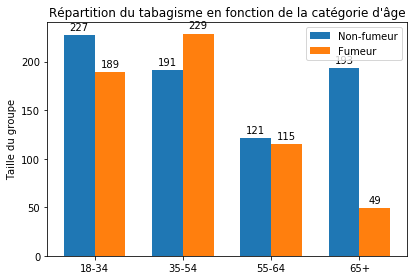

In [20]:
labels = ['18-34', '35-54', '55-64', '65+']
nn_smkrs = [A_non_smokers,B_non_smokers,C_non_smokers,D_non_smokers]
smkrs = [A_smokers,B_smokers,C_smokers,D_smokers]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nn_smkrs, width, label='Non-fumeur')
rects2 = ax.bar(x + width/2, smkrs, width, label='Fumeur')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taille du groupe')
ax.set_title('Répartition du tabagisme en fonction de la catégorie d\'âge')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Ces deux graphique mettent en évidences plusieurs choses :
    - le taux de mortalité à 20 ans est très dépendant de l'âge (ce qui après réflexion semble évident),
    - la proportion de fumeur dépend de l'âge,
    - pour chaque catégorie d'âge la mortalité des fumeurs est plus importantes que celles des non-fumeurs.

## Régression logistique

Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, on réalise une régression logistique. Pour cela on introduit la variable Death qui vaut 1 si l'individu est décédé dans la période de 20 ans, 0 sinon.

In [23]:
data['Death']=0
data.loc[data['Status']=='Dead','Death'] = 1


In [25]:
x=data['Age']
x=sm.add_constant(x)
y=data['Death']

In [30]:
model = sm.Logit(y, x)
result = model.fit(method='newton')
result.summary()


Optimization terminated successfully.
         Current function value: 0.382339
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Death   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1312
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Apr 2020   Pseudo R-squ.:                  0.3560
Time:                        22:33:45   Log-Likelihood:                -502.39
converged:                       True   LL-Null:                       -780.16
                                        LLR p-value:                7.883e-123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1045      0.321    -18.992      0.000      -6.735      -5.475
Age            0.0977      0.006     17.578      0.000       0.087       0.109
==============================================================================
"""

KeyError: 'Frequency'

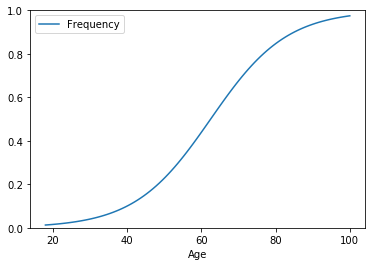

In [39]:
data_pred = pd.DataFrame({'Age': np.linspace(start=18, stop=100, num=100), 'Constant': 1})
data_pred['Frequency'] = result.predict(data_pred[['Constant','Age']])
data_pred.plot(x="Age",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Age"],y=data["Frequency"])
plt.grid(True)